In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
%matplotlib inline
import pandas as pd
from os import listdir
from os.path import isfile, join
import seaborn as sns

from scipy.signal import savgol_filter

In [2]:
font = matplotlib.font_manager.findSystemFonts(fontpaths="../Roboto", fontext='ttf')
plt.rcParams['font.family'] = 'Roboto-Regular'

In [3]:
path = "../data/"
files = [f for f in listdir(path) if isfile(join(path, f)) and "Store" not in f]

In [4]:
data = {}
for f in files:
    data[f] = pd.read_csv(path+f)


In [29]:
def legendsName(fileName):
    if("less" in fileName):
        return "PER Dueling (Random = 0 after 400 Episodes)"
    elif("network" in fileName):
        return "PER Dueling"
    elif("memory" in fileName):
        return "PER"
    else:
        return "Baseline"

In [30]:
def smooth(x,y,name,color):
    
    #apply a Savitzky-Golay filter
    smooth = savgol_filter(y, window_length = 101, polyorder = 7)#, mode = 'nearest') 351
    print(legendsName(name))
    plt.plot(x, smooth, label=legendsName(name), color=color)

In [31]:
def plotReward(data, saveName):
    colorsActual = ["indianred", "thistle", "steelblue"]
    colorsSmooth = ["maroon", "darkviolet", "navy"]
    i = 0
    plt.figure(figsize=(17,7))
    for d in data.keys():
        name = d
        if("Actions" not in name and "loss" not in name and "less" not in name):
            graph = data[name].loc[data[name][data[name].keys().values[1]] < 1500]
            x = graph[data[name].keys().values[1]]
            y = graph[data[name].keys().values[2]]
            plt.plot(x,y, color=colorsActual[i])
            smooth(x,y, name, colorsSmooth[i])
            i+=1
            
    plt.grid(color="black")
    plt.title("Training Reward", fontsize=40)
    plt.xlabel('Episode', fontsize=30)
    plt.ylabel('Reward', fontsize=30)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.legend(fontsize=20)
    plt.savefig(saveName, transparent=True)
    plt.show()


PER
Baseline
PER Dueling


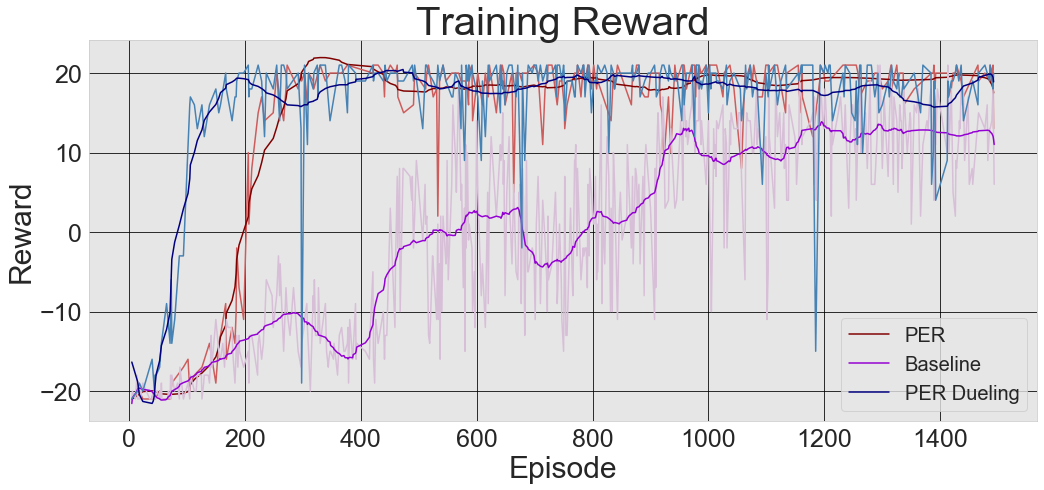

In [32]:
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
plotReward(data, "../plt/Reward")

In [59]:
def plotRandom(data, saveName):
    colorsActual = ["maroon", "navy", "darkorange"]
    i = 0
    plt.figure(figsize=(17,7))
    for d in data.keys():
        name = d
        if(("per" in name or "memory" in name) and "loss" not in name and "Actions" not in name):
            print(name)
            graph = data[name].loc[data[name][data[name].keys().values[1]] > 1000]
            graph = graph.loc[graph[graph.keys().values[1]] < 1500]
            x = graph[data[name].keys().values[1]]
            y = graph[data[name].keys().values[2]]
            plt.plot(x,y, color=colorsActual[i], label=legendsName(name))
            #smooth(x,y, name, colorsSmooth[i])
            i+=1
            
    plt.grid(color="black")
    plt.title("Training Reward", fontsize=40)
    plt.xlabel('Episode', fontsize=30)
    plt.ylabel('Reward', fontsize=30)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.legend(fontsize=20)
    plt.savefig(saveName, transparent=True)
    plt.show()



run-PongDeterministic-v4-new-memory_2019-11-28 10_59_31.776389_cuda-tag-total_reward.csv
run-PongDeterministic-v4-per_new_network-less-random-2019-11-30 11_08_41.039367_cuda-tag-total_reward.csv
run-PongDeterministic-v4-per_new_network_2019-11-28 22_34_49.692606_cuda-tag-total_reward.csv


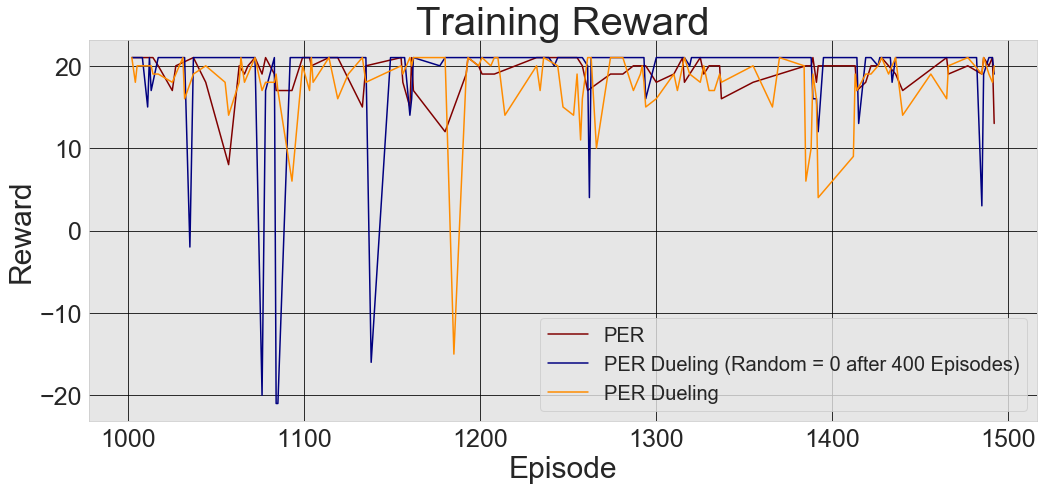

In [62]:
plotRandom(data, "../plt/RewardRandom")